# Problem

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

All the visited cells of the path are 0.

All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).

The length of a clear path is the number of visited cells of this path.

 
#### Example 1:

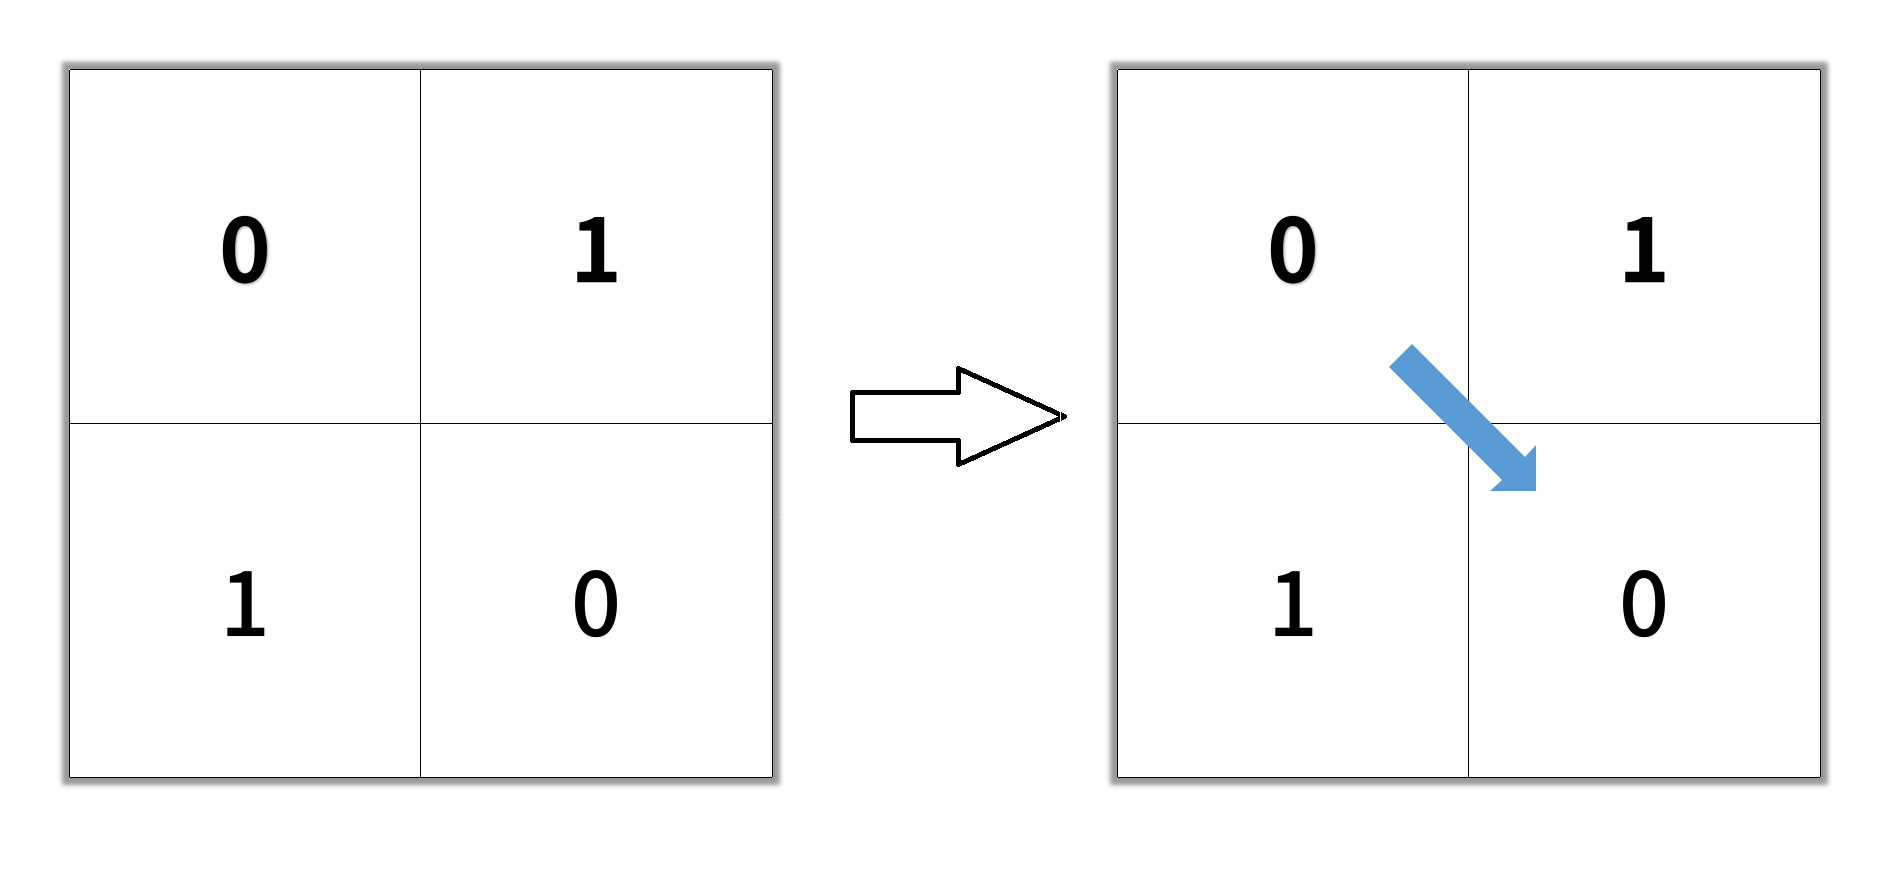

Input: grid = [[0,1],[1,0]]

Output: 2

#### Example 2:

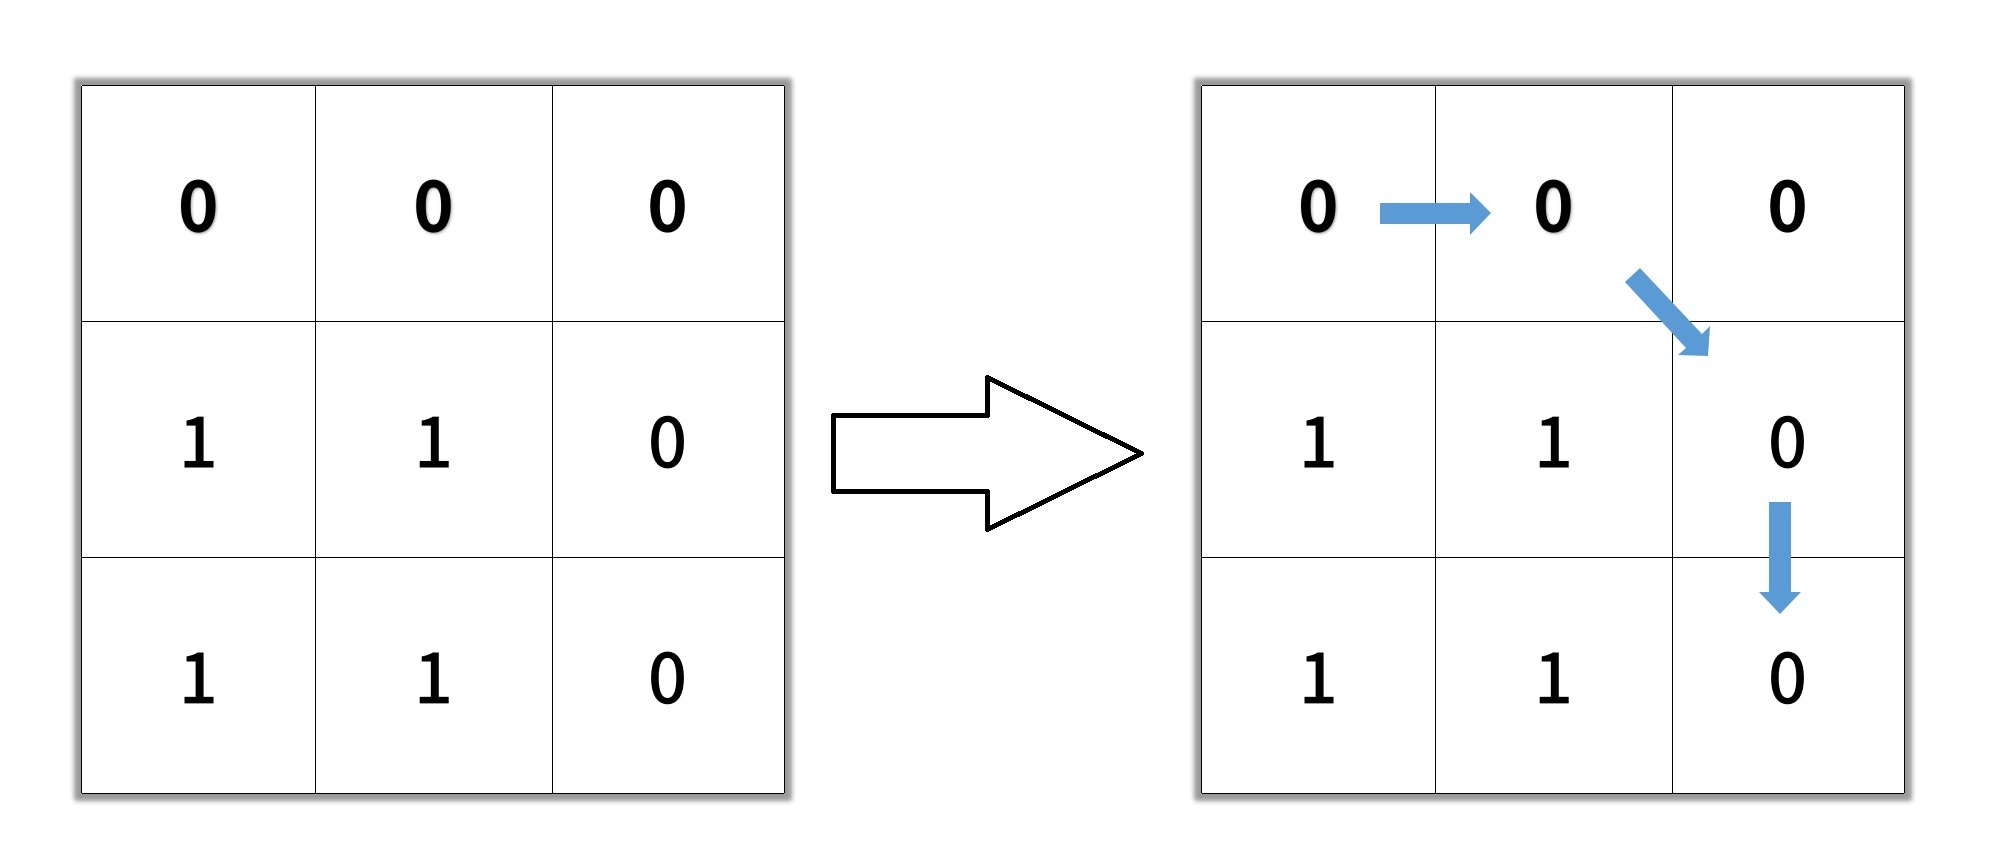

Input: grid = [[0,0,0],[1,1,0],[1,1,0]]

Output: 4

#### Example 3:

Input: grid = [[1,0,0],[1,1,0],[1,1,0]]

Output: -1
 

Constraints:

n == grid.length

n == grid[i].length

1 <= n <= 100

grid[i][j] is 0 or 1

In [ ]:
from collections import deque
from typing import List

class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        if grid[0][0] != 0 or grid[-1][-1] != 0:
            return -1
        
        N = len(grid) # constraint
        dir = [[-1,-1], [-1,0], [-1,1], [0,-1], [0,1], [1,-1], [1,0], [1,1]]
        q = deque()
        q.append((0,0,1)) # row, col, length of path
        visited = set((0,0))

        while q:
            r, c, length = q.popleft()
            if min(r,c)< 0 or max(r,c)>=N or grid[r][c]: # if grid is 1
                continue
            if r == N - 1 and c == N - 1: # if reaches goal
                return length
            for dr, dc in dir: 
                if (r + dr, c + dc) not in visited: # if new cell
                    q.append((r + dr, c + dc, length + 1)) # add it to queue and new layer
                    visited.add((r+dr,c+dc)) 
        return -1